# Exercise 2 – Multivariate Linear Regression

Name - Matrikelnummer 
1) Pham, Ngoc Anh Trung - 7176267
2) Viktor Vironski - 4330455
3) Andy Disser - 5984875

In [1]:
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
data = iris.data

In [4]:
class OrdinaryLeastSquares:
    def __init__(self):
        self.X = None
        self.Y = None
        self.beta = None
        
    
    def fit(self, X, Y):  
        """
        Fits the model parameters using least squares.
        
        Parameters
        ----------
           - X: Matrix of input vectors
           - Y: Matrix of target vectors
           
        Returns
        -------
           - weights beta_1 to beta_p
        """
        
        # add a column of ones in the matrix of X
        self.X = np.c_[np.ones(len(X)),X]
        self.Y = Y
        
        # beta_head = (X^T * X)^-1 * X^T * Y
        weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(self.X),self.X)),np.transpose(self.X)),Y)
        self.beta = weights
        return self.beta
        
    def predict(self, X):
        """
        Predict the target vektors Y.
        
        Parameter
        ---------
           - X: Matrix of input vectors
           
        Returns
        -------
           - predicted target vectors Y.
        """
        # Y = X * Beta + epsilon
        Y_head = np.matmul(np.c_[np.ones(len(X)),X],self.beta)
        return Y_head

# Test the methods on the iris data set

In [5]:
# random split of the data
shuffled_data = np.random.permutation(data)
training, test = data[:100,:], data[100:,:]

# split the data into X and Y
X_training, Y_training = training[:,:2], training[:,2:]
X_test, Y_test = test[:,:2], test[:,2:]

In [6]:
# training the model
mlr_iris = OrdinaryLeastSquares()
mlr_iris.fit(X_training, Y_training)

# predict the petal values from the sepal values
Y_hat = mlr_iris.predict(X_test)

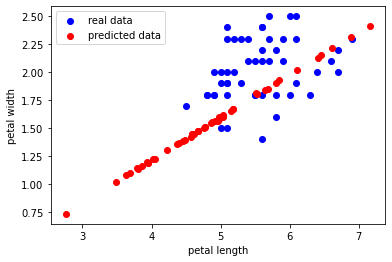

In [7]:
plt.figure()
plt.scatter(Y_test[:,0],Y_test[:,1], color='blue')  
plt.scatter(Y_hat[:,0], Y_hat[:,1], color='red')
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(["real data", "predicted data"])
plt.show()